# Davis data viewer

This is an interactive data viewer for playing around with the scalling to vizualize HRDIC data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.colors as colors
import HRDIC_analysis as hrdic
%matplotlib notebook

This cell imports the data into a list `f_list`:

In [2]:
fname ='../data/p1-1.TXT'
def_map = hrdic.DeformationMap('../data/',fname)

The scrubbing function:

In [3]:
def scrubF1(fig,fmap,component,colourmap='bwr',cmin=0.0,cmax=0.5):
    if component == 'f11':
        fig.set_data(fmap.f11)
        fig.axes.set_title(r'$F_{11}$')
    if component == 'f22':
        fig.set_data(fmap.f22)
        fig.axes.set_title(r'$F_{22}$')
    if component == 'f12':
        fig.set_data(fmap.f12)
        fig.axes.set_title(r'$F_{12}$')
    if component == 'f21':
        fig.set_data(fmap.f21)
        fig.axes.set_title(r'$F_{21}$')
    if component=='Max shear':
        fig.set_data(fmap.max_shear)
        fig.axes.set_title(r'$Max shear$')
    fig.set_clim([cmin,cmax])
    fig.set_cmap(colourmap)
    fig.set_clim([cmin,cmax])
    plt.draw()
    
def scrub_max_shear_log(fig,fmap,cmin=0.0,cmax=0.5):
    fig.axes.set_title(r'$Max shear$')
    fig.set_cmap('viridis')
    fig.set_clim([cmin,cmax])
    fig.set_data(fmap.max_shear)
    plt.draw()

Setup the plot:

<IPython.core.display.Javascript object>


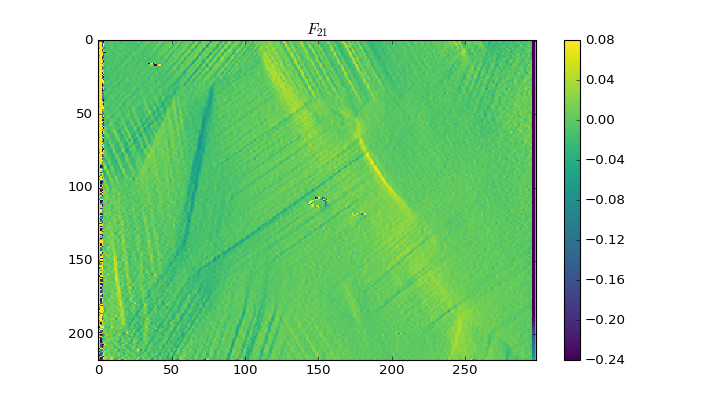

In [4]:
f,ax=plt.subplots(1,1,figsize=(9,5))
image_map=ax.imshow(def_map.f12[10:-10,10:-10],
                  vmin=0,vmax=0.09,
                  cmap='viridis',
                  interpolation='none')
plt.colorbar(image_map);

Deformation gradient components:

In [5]:
interactive(scrubF1, fig=fixed(image_map), fmap=fixed(def_map),
            component=('f11','f22','f12','f21','Max shear'),
            colourmap= ('viridis','bwr'),
            cmin=(-0.5,0.0,0.01),
            cmax=(0.0,0.6,0.01))

<IPython.core.display.Javascript object>


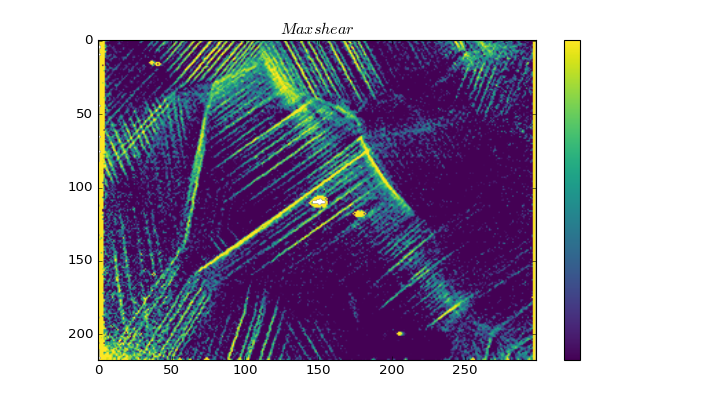

In [8]:
f2,ax=plt.subplots(1,1,figsize=(9,5))
max_shear_map=ax.imshow(def_map.max_shear[10:-10,10:-10],
                    norm=colors.LogNorm( vmin=0.001,vmax=0.03),
                    cmap='viridis',interpolation='bilinear')
plt.colorbar(max_shear_map);

In [11]:
interactive(scrub_max_shear_log, fig=fixed(max_shear_map), fmap=fixed(def_map),
            cmin=(0.0001,0.6,0.001),
            cmax=(0.0001,0.6,0.001))